# Generate PCA/UMAP/MDS representations of all datasets - males vs females

In [1]:
import umap
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from aging.plotting import figure, format_plots

In [2]:
format_plots()

In [3]:
def minmax(df):
    df = df - df.min()
    return df / df.max()

In [4]:
colors = ['#c7eae5', '#008C8D']
male_cmap = sns.blend_palette(colors, as_cmap=True)
colors = ['#fee6ce', '#d94801']
female_cmap = sns.blend_palette(colors, as_cmap=True)

In [5]:
cmapmap = {
    'ont_males': male_cmap,
    'ont_females': female_cmap,
    'long_v2_male': male_cmap,
    'long_v2_female': female_cmap,
}

## V11

In [6]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_males_raw_usage_matrix_v00.parquet')
keep_syllables = np.loadtxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/to_keep_syllables_raw.txt', dtype=int)
df = df[keep_syllables]
df['exp'] = 'ont_males'
df = df.set_index('exp', append=True)
df = minmax(df)

_df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_females_raw_usage_matrix_v00.parquet')
_df = _df[keep_syllables]
_df = _df.query('age < 100')
_df['exp'] = 'ont_females'
_df = _df.set_index('exp', append=True)
_df = minmax(_df)

df = pd.concat([df, _df])

In [7]:
latents = PCA(n_components=2).fit_transform(df)

In [8]:
scores_df = pd.DataFrame(latents, df.index)

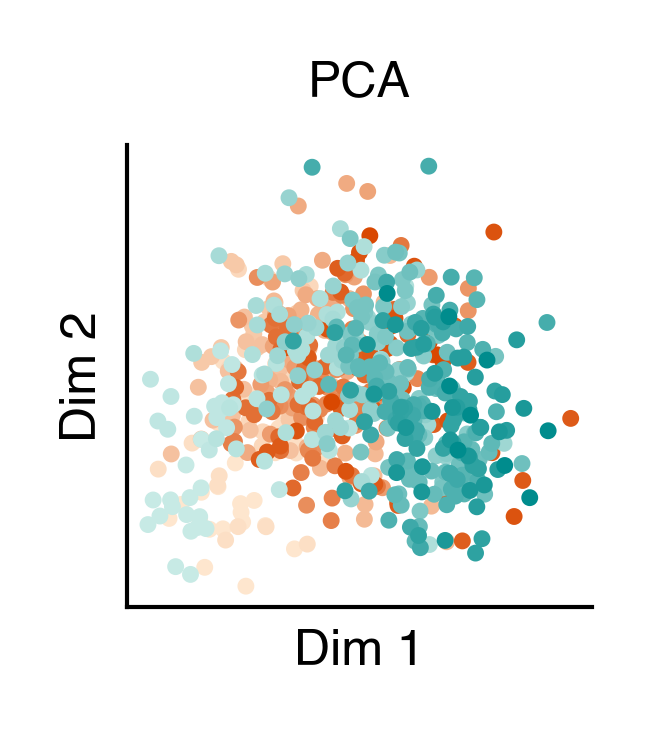

In [9]:
fig = figure(1, 1)
ax = fig.gca()
for experiment, _df in scores_df.groupby('exp'):
    ax.scatter(_df[0], _df[1], c=_df.index.get_level_values('age'), cmap=cmapmap[experiment], s=1.5)
ax.set(xticks=[], yticks=[], xlabel="Dim 1", ylabel="Dim 2", title='PCA')
sns.despine()

In [18]:
latents = umap.UMAP(n_components=2, metric='euclidean').fit_transform(df)

In [19]:
scores_df = pd.DataFrame(latents, df.index)

In [20]:
out = scores_df.groupby(['age', 'exp']).mean()

In [21]:
out = out.groupby('exp').rolling(3, center=True, min_periods=1).mean()

In [22]:
out

0         1
exp         age exp                            
ont_females 4   ont_females  3.089461  8.806069
            8   ont_females  3.777032  8.519266
            12  ont_females  4.725598  8.040648
            20  ont_females  5.780147  7.941467
            24  ont_females  5.732482  6.895002
            28  ont_females  6.096619  6.646764
            32  ont_females  5.679435  6.241615
            36  ont_females  5.999609  7.072224
            40  ont_females  5.804585  6.885586
            44  ont_females  5.900798  6.749045
            48  ont_females  6.277183  6.565412
            52  ont_females  6.587922  6.443063
            56  ont_females  6.847402  6.446528
            60  ont_females  6.632113  6.246823
            64  ont_females  6.561546  6.710830
            68  ont_females  6.609361  6.725508
            72  ont_females  6.332301  6.391336
            78  ont_females  6.192784  5.625527
            80  ont_females  5.895435  5.273125
            84  ont_females  5.861297  5.377590
            90  ont_females  5.722228  5.443517
ont_males   4   ont_males    3.099843  9.108194
            8   ont_males    3.419895  8.432870
            12  ont_males    3.771995  7.426702
            16  ont_males    4.030511  6.822502
            20  ont_males    4.057894  6.235676
            24  ont_males    4.006595  5.959612
            28  ont_males    4.220301  5.522766
            32  ont_males    4.033093  5.376179
            36  ont_males    4.025641  5.152736
            40  ont_males    3.923769  4.907013
            44  ont_males    3.941086  4.692839
            48  ont_males    3.963331  4.096318
            52  ont_males    3.783913  4.123212
            56  ont_males    3.875666  4.176373
            60  ont_males    3.967595  4.242344
            64  ont_males    4.047826  4.333584
            68  ont_males    4.293869  4.107854
            72  ont_males    4.408255  4.228614
            78  ont_males    4.647078  3.948631
            80  ont_males    4.663100  4.023904
            84  ont_males    4.689008  3.918844
            90  ont_males    4.613186  3.710304
            103 ont_males    4.572814  3.591669

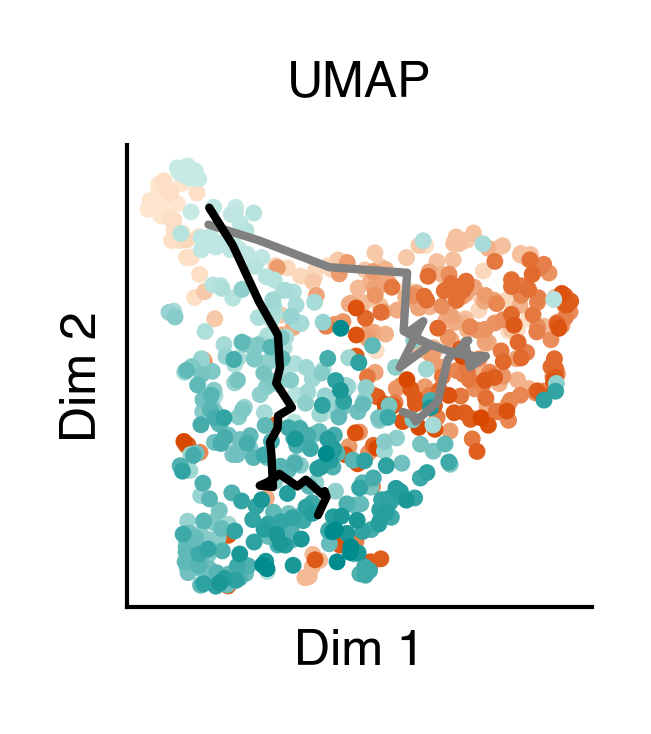

In [23]:
fig = figure(1, 1)
ax = fig.gca()
for experiment, _df in scores_df.groupby("exp"):
    ax.scatter(
        _df[0],
        _df[1],
        c=_df.index.get_level_values("age"),
        cmap=cmapmap[experiment],
        s=1.5,
    )
    ax.plot(out.loc[experiment, 0], out.loc[experiment, 1], color='k' if experiment == 'ont_males' else 'gray')
ax.set(xticks=[], yticks=[], xlabel="Dim 1", ylabel="Dim 2", title="UMAP")
sns.despine()

In [13]:
latents = MDS(n_components=2).fit_transform(df)

In [14]:
scores_df = pd.DataFrame(latents, df.index)

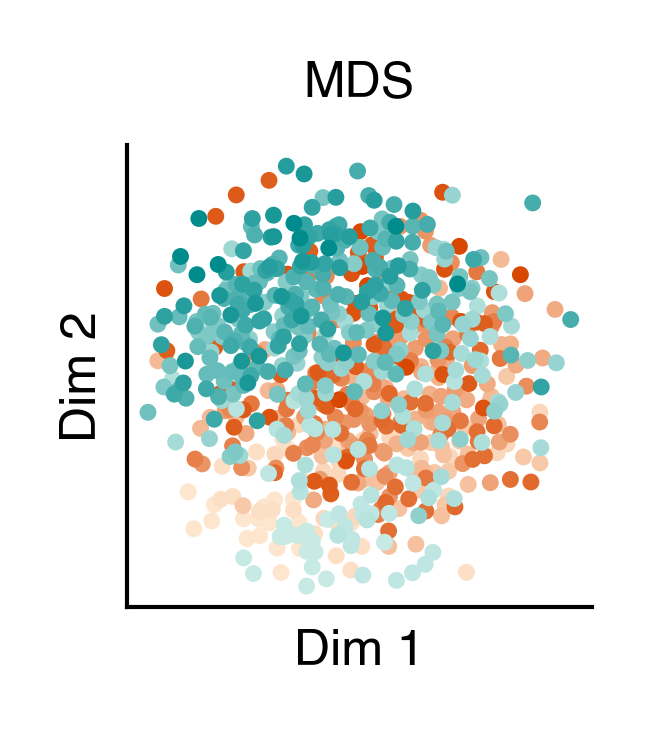

In [15]:
fig = figure(1, 1)
ax = fig.gca()
for experiment, _df in scores_df.groupby('exp'):
    ax.scatter(_df[0], _df[1], c=_df.index.get_level_values('age'), cmap=cmapmap[experiment], s=1.5)
ax.set(xticks=[], yticks=[], xlabel="Dim 1", ylabel="Dim 2", title='MDS')
sns.despine()

In [16]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/longtogeny_v2_males_raw_usage_matrix_v00.parquet')
df = df.reindex(columns=keep_syllables, fill_value=0)
df = df.query('age < 90')
df['age_binned'] = ((df.index.get_level_values('age') * 7) // 30) * 4
df = df.set_index('age_binned', append=True)
df = df.groupby(['mouse', 'age_binned']).sample(n=1)
df['exp'] = 'long_v2_male'
df = df.set_index('exp', append=True)
df = minmax(df)

_df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/longtogeny_v2_females_raw_usage_matrix_v00.parquet')
_df = _df.reindex(columns=keep_syllables, fill_value=0)
_df = _df.query('age < 90')
_df['age_binned'] = ((_df.index.get_level_values('age') * 7) // 30) * 4
_df = _df.set_index('age_binned', append=True)
_df = _df.groupby(['mouse', 'age_binned']).sample(n=1)
_df['exp'] = 'long_v2_female'
_df = _df.set_index('exp', append=True)
_df = minmax(_df)

In [17]:
df = pd.concat([df, _df])

In [18]:
latents = PCA(n_components=2).fit_transform(df)

In [19]:
scores_df = pd.DataFrame(latents, df.index)

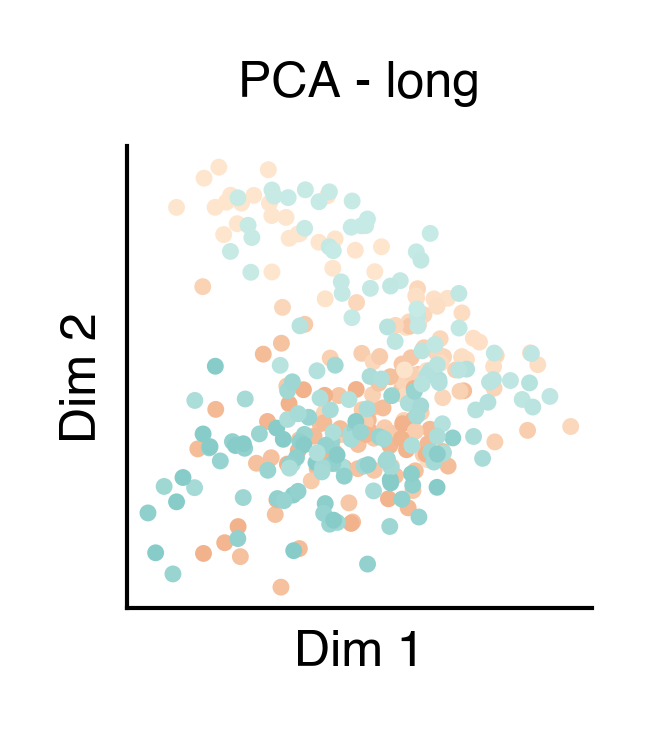

In [20]:
fig = figure(1, 1)
ax = fig.gca()
for experiment, _df in scores_df.groupby('exp'):
    ax.scatter(_df[0], _df[1], c=_df.index.get_level_values('age'), cmap=cmapmap[experiment], s=1.5, vmax=90)
ax.set(xticks=[], yticks=[], xlabel="Dim 1", ylabel="Dim 2", title='PCA - long')
sns.despine()

In [21]:
latents = umap.UMAP(n_components=2, metric='euclidean').fit_transform(df)

In [22]:
scores_df = pd.DataFrame(latents, df.index)

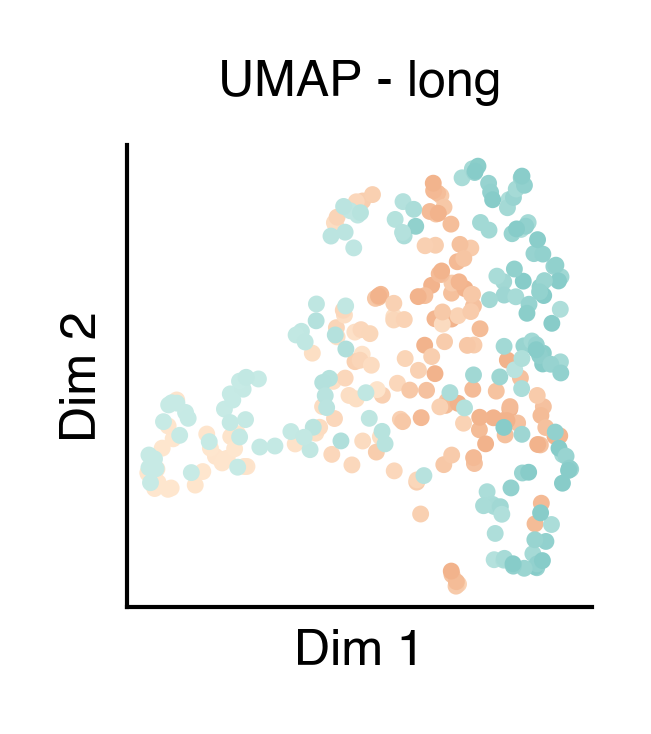

In [23]:
fig = figure(1, 1)
ax = fig.gca()
for experiment, _df in scores_df.groupby('exp'):
    ax.scatter(_df[0], _df[1], c=_df.index.get_level_values('age'), cmap=cmapmap[experiment], s=1.5, vmax=90)
ax.set(xticks=[], yticks=[], xlabel="Dim 1", ylabel="Dim 2", title='UMAP - long')
sns.despine()

In [24]:
latents = MDS(n_components=2).fit_transform(df)

In [25]:
scores_df = pd.DataFrame(latents, df.index)

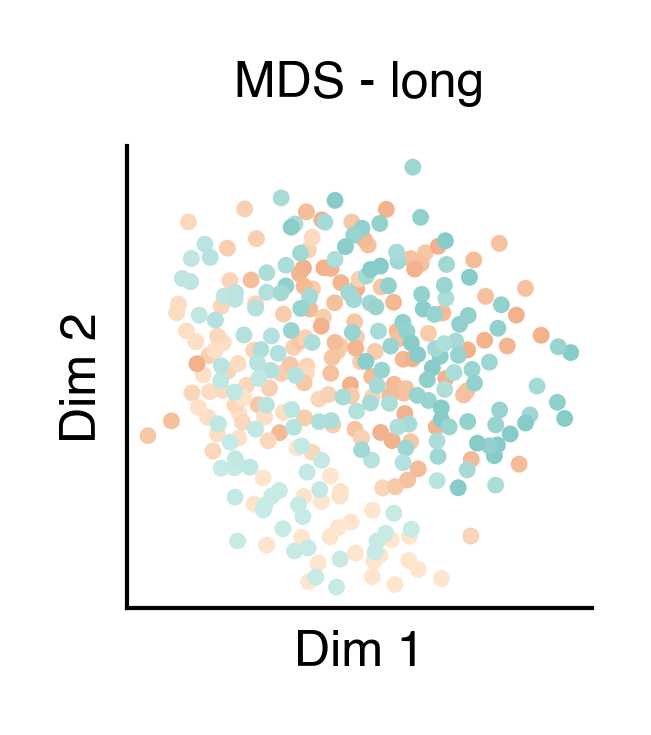

In [26]:
fig = figure(1, 1)
ax = fig.gca()
for experiment, _df in scores_df.groupby('exp'):
    ax.scatter(_df[0], _df[1], c=_df.index.get_level_values('age'), cmap=cmapmap[experiment], s=1.5, vmax=90)
ax.set(xticks=[], yticks=[], xlabel="Dim 1", ylabel="Dim 2", title='MDS - long')
sns.despine()

## V12

In [27]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_12/ontogeny_males_raw_usage_matrix_v00.parquet')
keep_syllables = np.loadtxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_12/to_keep_syllables_raw.txt', dtype=int)
df = df[keep_syllables]
df['exp'] = 'ont_males'
df = df.set_index('exp', append=True)
df = minmax(df)

_df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_12/ontogeny_females_raw_usage_matrix_v00.parquet')
_df = _df[keep_syllables]
_df = _df.query('age < 100')
_df['exp'] = 'ont_females'
_df = _df.set_index('exp', append=True)
_df = minmax(_df)

df = pd.concat([df, _df])

In [28]:
latents = PCA(n_components=2).fit_transform(df)

In [29]:
scores_df = pd.DataFrame(latents, df.index)

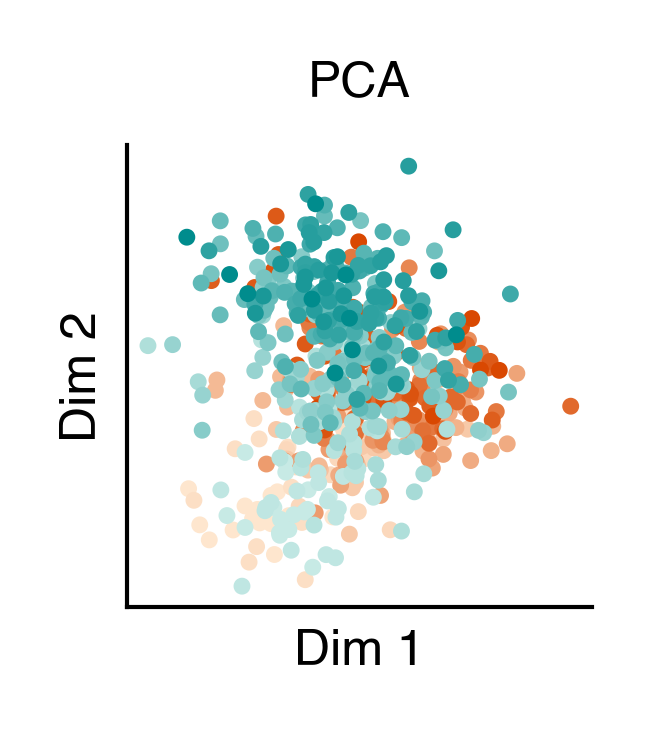

In [30]:
fig = figure(1, 1)
ax = fig.gca()
for experiment, _df in scores_df.groupby('exp'):
    ax.scatter(_df[0], _df[1], c=_df.index.get_level_values('age'), cmap=cmapmap[experiment], s=1.5)
ax.set(xticks=[], yticks=[], xlabel="Dim 1", ylabel="Dim 2", title='PCA')
sns.despine()

In [31]:
latents = umap.UMAP(n_components=2, metric='euclidean').fit_transform(df)

In [32]:
scores_df = pd.DataFrame(latents, df.index)

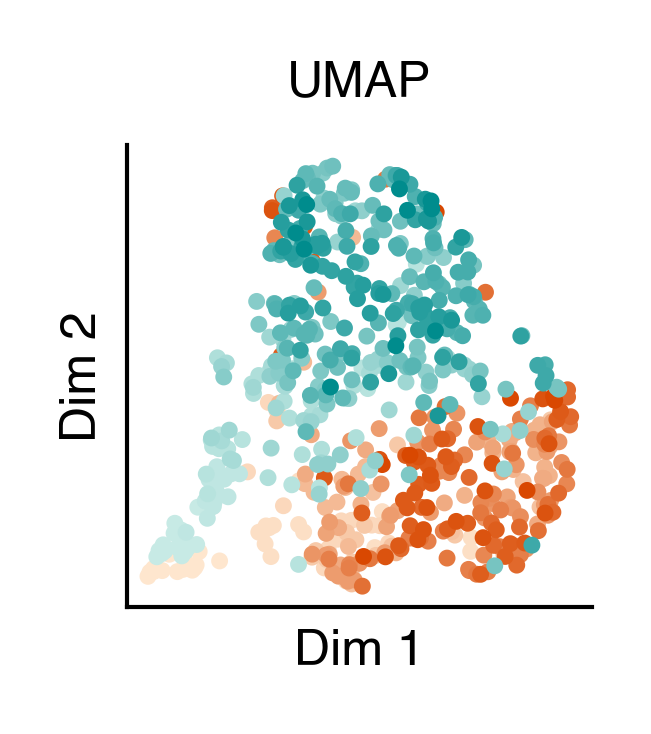

In [33]:
fig = figure(1, 1)
ax = fig.gca()
for experiment, _df in scores_df.groupby('exp'):
    ax.scatter(_df[0], _df[1], c=_df.index.get_level_values('age'), cmap=cmapmap[experiment], s=1.5)
ax.set(xticks=[], yticks=[], xlabel="Dim 1", ylabel="Dim 2", title='UMAP')
sns.despine()

In [34]:
latents = MDS(n_components=2).fit_transform(df)

In [35]:
scores_df = pd.DataFrame(latents, df.index)

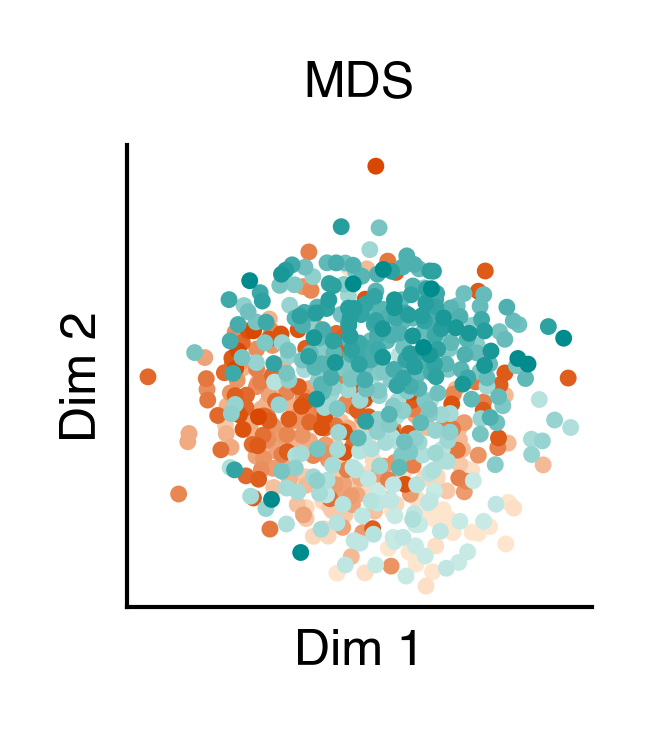

In [36]:
fig = figure(1, 1)
ax = fig.gca()
for experiment, _df in scores_df.groupby('exp'):
    ax.scatter(_df[0], _df[1], c=_df.index.get_level_values('age'), cmap=cmapmap[experiment], s=1.5)
ax.set(xticks=[], yticks=[], xlabel="Dim 1", ylabel="Dim 2", title='MDS')
sns.despine()

In [37]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_12/longtogeny_v2_males_raw_usage_matrix_v00.parquet')
df = df.reindex(columns=keep_syllables, fill_value=0)
df = df.query('age < 90')
df['age_binned'] = ((df.index.get_level_values('age') * 7) // 30) * 4
df = df.set_index('age_binned', append=True)
df = df.groupby(['mouse', 'age_binned']).sample(n=1)
df['exp'] = 'long_v2_male'
df = df.set_index('exp', append=True)
df = minmax(df)

_df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_12/longtogeny_v2_females_raw_usage_matrix_v00.parquet')
_df = _df.reindex(columns=keep_syllables, fill_value=0)
_df = _df.query('age < 90')
_df['age_binned'] = ((_df.index.get_level_values('age') * 7) // 30) * 4
_df = _df.set_index('age_binned', append=True)
_df = _df.groupby(['mouse', 'age_binned']).sample(n=1)
_df['exp'] = 'long_v2_female'
_df = _df.set_index('exp', append=True)
_df = minmax(_df)

In [38]:
df = pd.concat([df, _df])

In [39]:
latents = PCA(n_components=2).fit_transform(df)

In [40]:
scores_df = pd.DataFrame(latents, df.index)

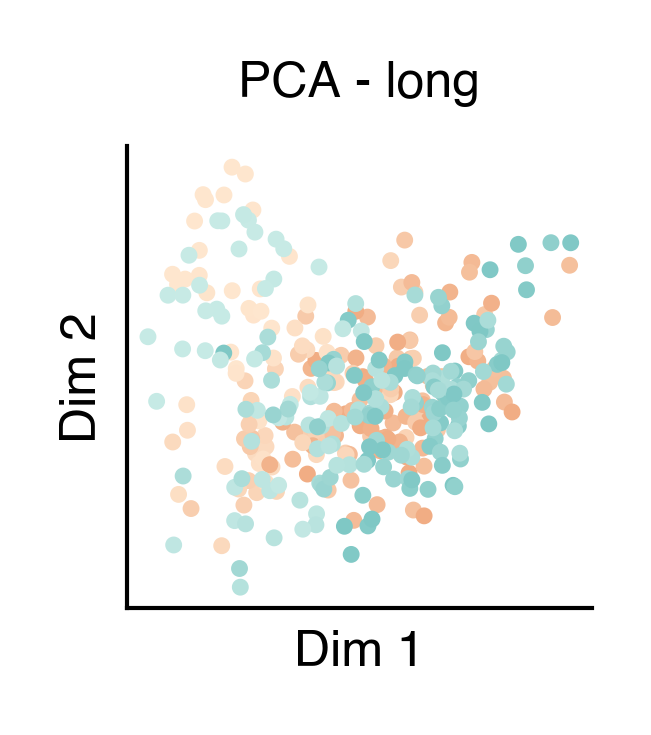

In [41]:
fig = figure(1, 1)
ax = fig.gca()
for experiment, _df in scores_df.groupby('exp'):
    ax.scatter(_df[0], _df[1], c=_df.index.get_level_values('age'), cmap=cmapmap[experiment], s=1.5, vmax=90)
ax.set(xticks=[], yticks=[], xlabel="Dim 1", ylabel="Dim 2", title='PCA - long')
sns.despine()

In [42]:
latents = umap.UMAP(n_components=2, metric='euclidean').fit_transform(df)

In [43]:
scores_df = pd.DataFrame(latents, df.index)

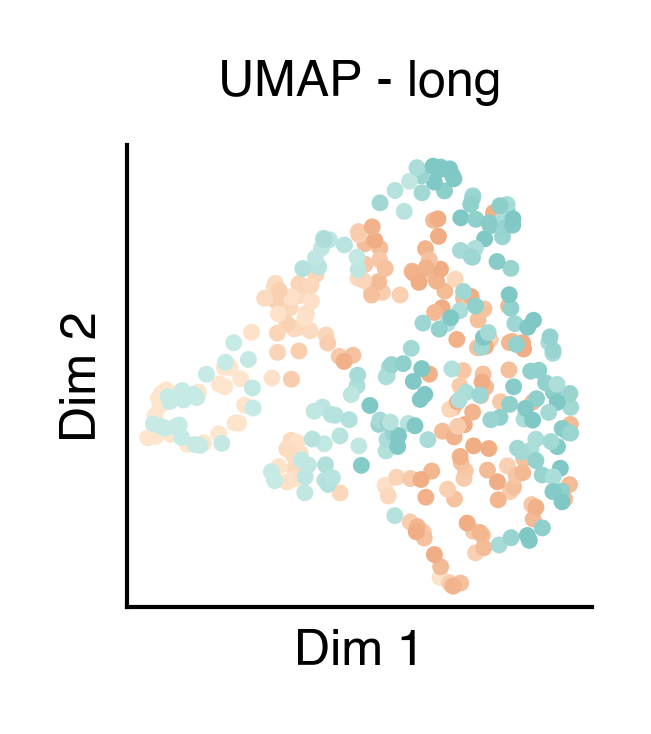

In [44]:
fig = figure(1, 1)
ax = fig.gca()
for experiment, _df in scores_df.groupby('exp'):
    ax.scatter(_df[0], _df[1], c=_df.index.get_level_values('age'), cmap=cmapmap[experiment], s=1.5, vmax=90)
ax.set(xticks=[], yticks=[], xlabel="Dim 1", ylabel="Dim 2", title='UMAP - long')
sns.despine()

In [45]:
latents = MDS(n_components=2).fit_transform(df)

In [46]:
scores_df = pd.DataFrame(latents, df.index)

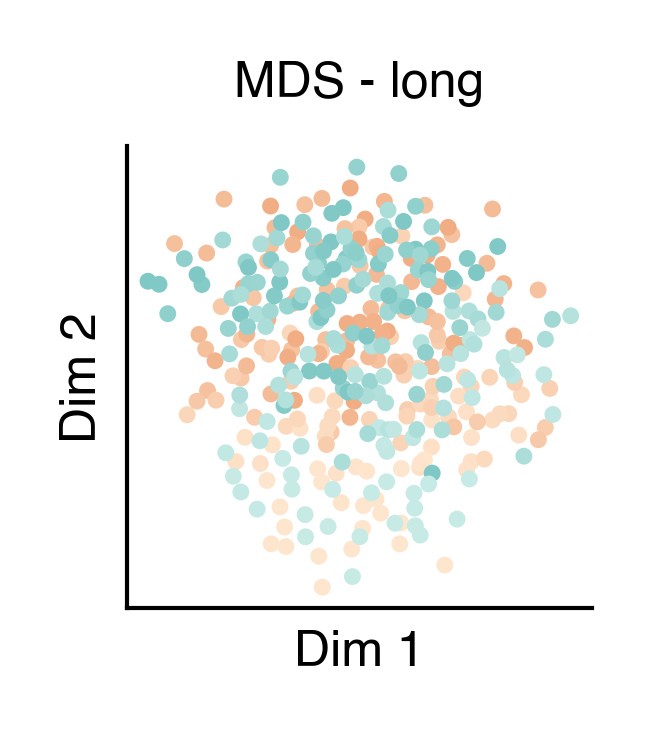

In [47]:
fig = figure(1, 1)
ax = fig.gca()
for experiment, _df in scores_df.groupby('exp'):
    ax.scatter(_df[0], _df[1], c=_df.index.get_level_values('age'), cmap=cmapmap[experiment], s=1.5, vmax=90)
ax.set(xticks=[], yticks=[], xlabel="Dim 1", ylabel="Dim 2", title='MDS - long')
sns.despine()